In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [38]:
data = pd.read_csv('bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [39]:
data.info()
print('---')
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
---


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [40]:
X = data.drop(columns = ['deposit'], axis = 1)
y = data['deposit'].map({'yes': 1, 'no': 0})

In [41]:
cat_cols = X.select_dtypes(include='object').columns.to_list()
num_cols = X.select_dtypes(exclude='object').columns.to_list()

In [42]:
X_cats = X[cat_cols].replace('unknown', np.nan)
X_nums = X[num_cols]

In [43]:
numeric_tranformer = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy='median'))
])

In [44]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [45]:
onehot =categorical_transformer.named_steps['onehot']

In [46]:
preprocess = ColumnTransformer(
    transformers= [
        ('num', numeric_tranformer,num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [47]:
#X_cats2 = categorical_transformer.fit_transform(X_cats)

In [48]:
#X_cats2

In [49]:
#X_nums2= numeric_tranformer.fit_transform(X_nums)
#X_nums2

In [50]:
#cat_feature_name = onehot.get_feature_names_out(cat_cols)
#cat_feature_name

In [51]:
#X_num_df = pd.DataFrame(X_nums2, columns = num_cols)
#X_cats_df = pd.DataFrame(X_cats2, columns= cat_feature_name, dtype = int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([X_nums, X_cats], axis = 1),y,test_size= 0.2, random_state= 42, stratify=y)

X_train.shape, X_test.shape


((8929, 16), (2233, 16))

In [59]:
def train_and_evaluate(max_depth, criterion):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
    pipe = Pipeline([
        ('preprocess', preprocess),
        ('clf', clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    metrics = {
        'max_depth': max_depth,
        'criterion': criterion,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }
    cm = confusion_matrix(y_test, y_pred)
    return pipe, metrics, cm

experiment = []
result = []

for md in [3,5,7,None]:
    for criterion in ['gini', 'entropy']:
        pipe, metrics, cm = train_and_evaluate(md,criterion)
        experiment.append([pipe, metrics, cm])
        result.append(metrics)
result_df = pd.DataFrame(result)
print(result_df)

   max_depth criterion  accuracy  precision    recall        f1
0        3.0      gini  0.775190   0.823256  0.669187  0.738269
1        3.0   entropy  0.763099   0.845752  0.611531  0.709819
2        5.0      gini  0.788625   0.766364  0.796786  0.781279
3        5.0   entropy  0.794447   0.779124  0.790170  0.784608
4        7.0      gini  0.803403   0.772208  0.829868  0.800000
5        7.0   entropy  0.798925   0.766871  0.827032  0.795816
6        NaN      gini  0.783699   0.777778  0.760870  0.769231
7        NaN   entropy  0.783699   0.771483  0.772212  0.771847


In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

{'max_depth': 7, 'criterion': 'gini', 'accuracy': 0.8034034930586654, 'precision': 0.772207563764292, 'recall': 0.8298676748582231, 'f1': 0.8}


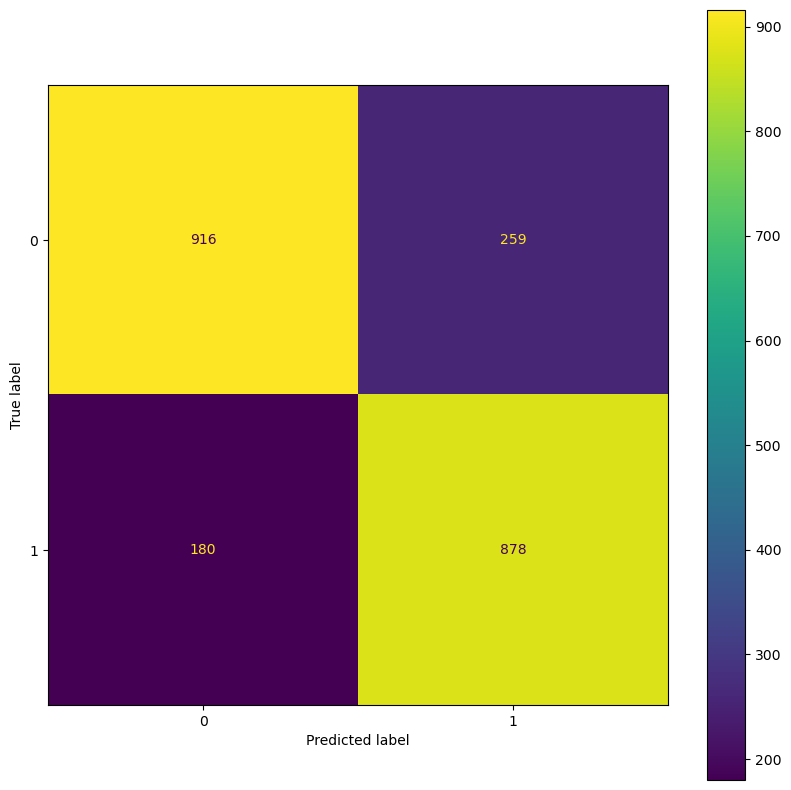

In [61]:
best_idx = result_df.reset_index().iloc[4]['index']
best_pipe, best_metric, best_cm = experiment[best_idx]
print(best_metric)

disp_cm = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=pipe.classes_)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
disp_cm.plot(ax = ax)

In [62]:
from sklearn.tree import plot_tree

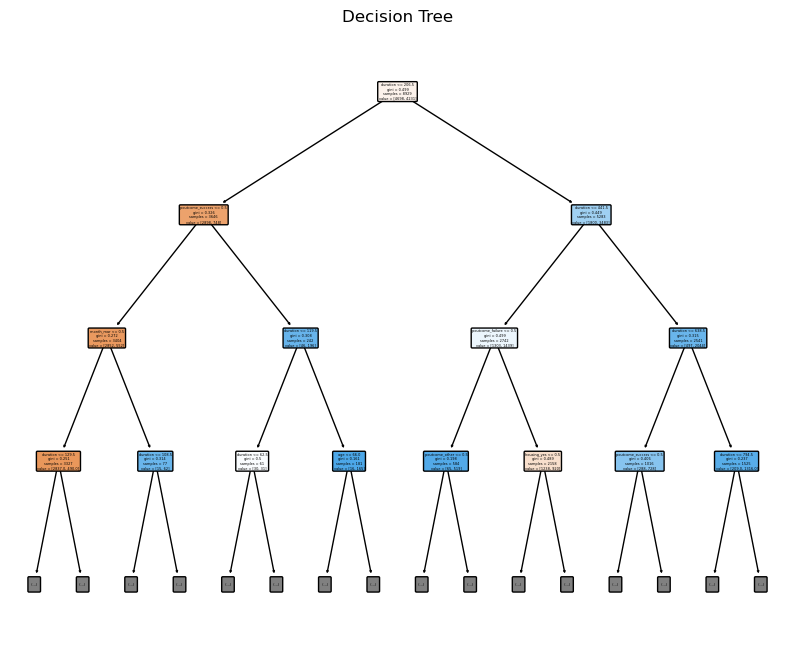

In [76]:
pre = best_pipe.named_steps['preprocess']
cats = pre.named_transformers_['cat'].named_steps['onehot'] if 'cat' in pre.named_transformers_ else None
num_cols = pre.transformers_[0][2] if len(pre.transformers_) >0 else []
cat_cols = pre.transformers_[1][2] if len(pre.transformers_) >1 else []

feature_names = []
feature_names.extend(num_cols)
if cats is not None:
    ohe_names = cats.get_feature_names_out(cat_cols).tolist()
    feature_names.extend(ohe_names)
else:
    feature_names.extend(cat_cols)
    
clf = best_pipe.named_steps['clf']

plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=feature_names, filled = True, rounded = True, max_depth=3)
plt.title('Decision Tree')
plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Bộ biến đổi
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# Pipeline kết hợp preprocessing + model
pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Lưới tham số
param_grid = {
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10],
    'model__criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

Best params: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 5}
Best CV score: 0.8038085848152589


In [86]:
# Default pipeline (không GridSearch)
default_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Fit model mặc định
default_pipe.fit(X_train, y_train)
y_pred_default = default_pipe.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# Best model từ GridSearch
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)

print(" Default RF Test Accuracy:", acc_default)
print(" Tuned RF Test Accuracy:", acc_best)

 Default RF Test Accuracy: 0.8553515450067174
 Tuned RF Test Accuracy: 0.9390953873712494
